# Temperature Prediction

# Data collection

In [2]:
#importing the basic library
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the data and printing the first 10 rows of the data
df=pd.read_csv('data.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
#displaying the bottom 10 rows of the dataset
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In this data we can see that the Independent variable "Next_Tmax" and "Next_Tmin" is Numerical type,

So we can say its a Linear regression problem.

 ## EXPLORATORY DATA ANALYSIS

In [5]:
#displaying the column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Here we can see that we have got two dependent variable and all other are independent variable

In [6]:
#displaying the number of columns and number of rows
df.shape

(7752, 25)

In [7]:
#checking the data type of all varialbe
data_types=df.dtypes
data_types

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
#counting the number of data type present
data_types.value_counts()

float64    24
object      1
dtype: int64

We can see that there are 24 variable with float type and 1 variable with object type.

In [9]:
#checking wheather null value is present or not
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
#displaying the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [11]:
#checking the count of unique value and their in categorical column
for i in df.columns:
  if df[i].dtype == 'object':
    print(f'----- columns: {i} -----')
    print('Number of Unique element :',df[i].nunique())
    print('Unique element and their frequency :',df[i].value_counts())
    print('\n\n\n')

----- columns: Date -----
Number of Unique element : 310
Unique element and their frequency : 07-07-2013    25
20-08-2017    25
20-08-2015    25
22-07-2017    25
19-08-2014    25
              ..
15-07-2017    25
24-08-2014    25
24-08-2015    25
22-07-2015    25
18-08-2013    25
Name: Date, Length: 310, dtype: int64






In [ ]:
for i in df.columns:
  if df[i].dtype != 'object':
    print(f'----- columns: {i} -----')
    print('Number of Unique Element :',df[i].nunique())
    print('Maximum :',df[i].max())
    print('Minimum :',df[i].min())
    print('\n\n\n')

----- columns: station -----
Number of Unique Element : 25
Maximum : 25.0
Minimum : 1.0




----- columns: Present_Tmax -----
Number of Unique Element : 167
Maximum : 37.6
Minimum : 20.0




----- columns: Present_Tmin -----
Number of Unique Element : 155
Maximum : 29.9
Minimum : 11.3




----- columns: LDAPS_RHmin -----
Number of Unique Element : 7672
Maximum : 98.5247345
Minimum : 19.79466629




----- columns: LDAPS_RHmax -----
Number of Unique Element : 7664
Maximum : 100.00015259999999
Minimum : 58.93628311




----- columns: LDAPS_Tmax_lapse -----
Number of Unique Element : 7675
Maximum : 38.54225522
Minimum : 17.62495378




----- columns: LDAPS_Tmin_lapse -----
Number of Unique Element : 7675
Maximum : 29.61934244
Minimum : 14.27264631




----- columns: LDAPS_WS -----
Number of Unique Element : 7675
Maximum : 21.85762099
Minimum : 2.882579625




----- columns: LDAPS_LH -----
Number of Unique Element : 7675
Maximum : 213.4140062
Minimum : -13.60321209




----- columns: LDAPS_

In [12]:
#looking at statistical information of Numerical type of data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [13]:
#looking at the statistical information of categorical type of data set 
df.describe(include='object').T

,count,unique,top,freq
Date,7750,310,07-07-2013,25


In [14]:
#storing numerical and categorical values separately
num_col=[]
cat_col=[]
for i in df.columns:
  if df[i].dtype != 'object':
    num_col.append(i)
  else:
    cat_col.append(i)
print('Numerical column :',num_col)
print('Categorical column :',cat_col)

Numerical column : ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
Categorical column : ['Date']


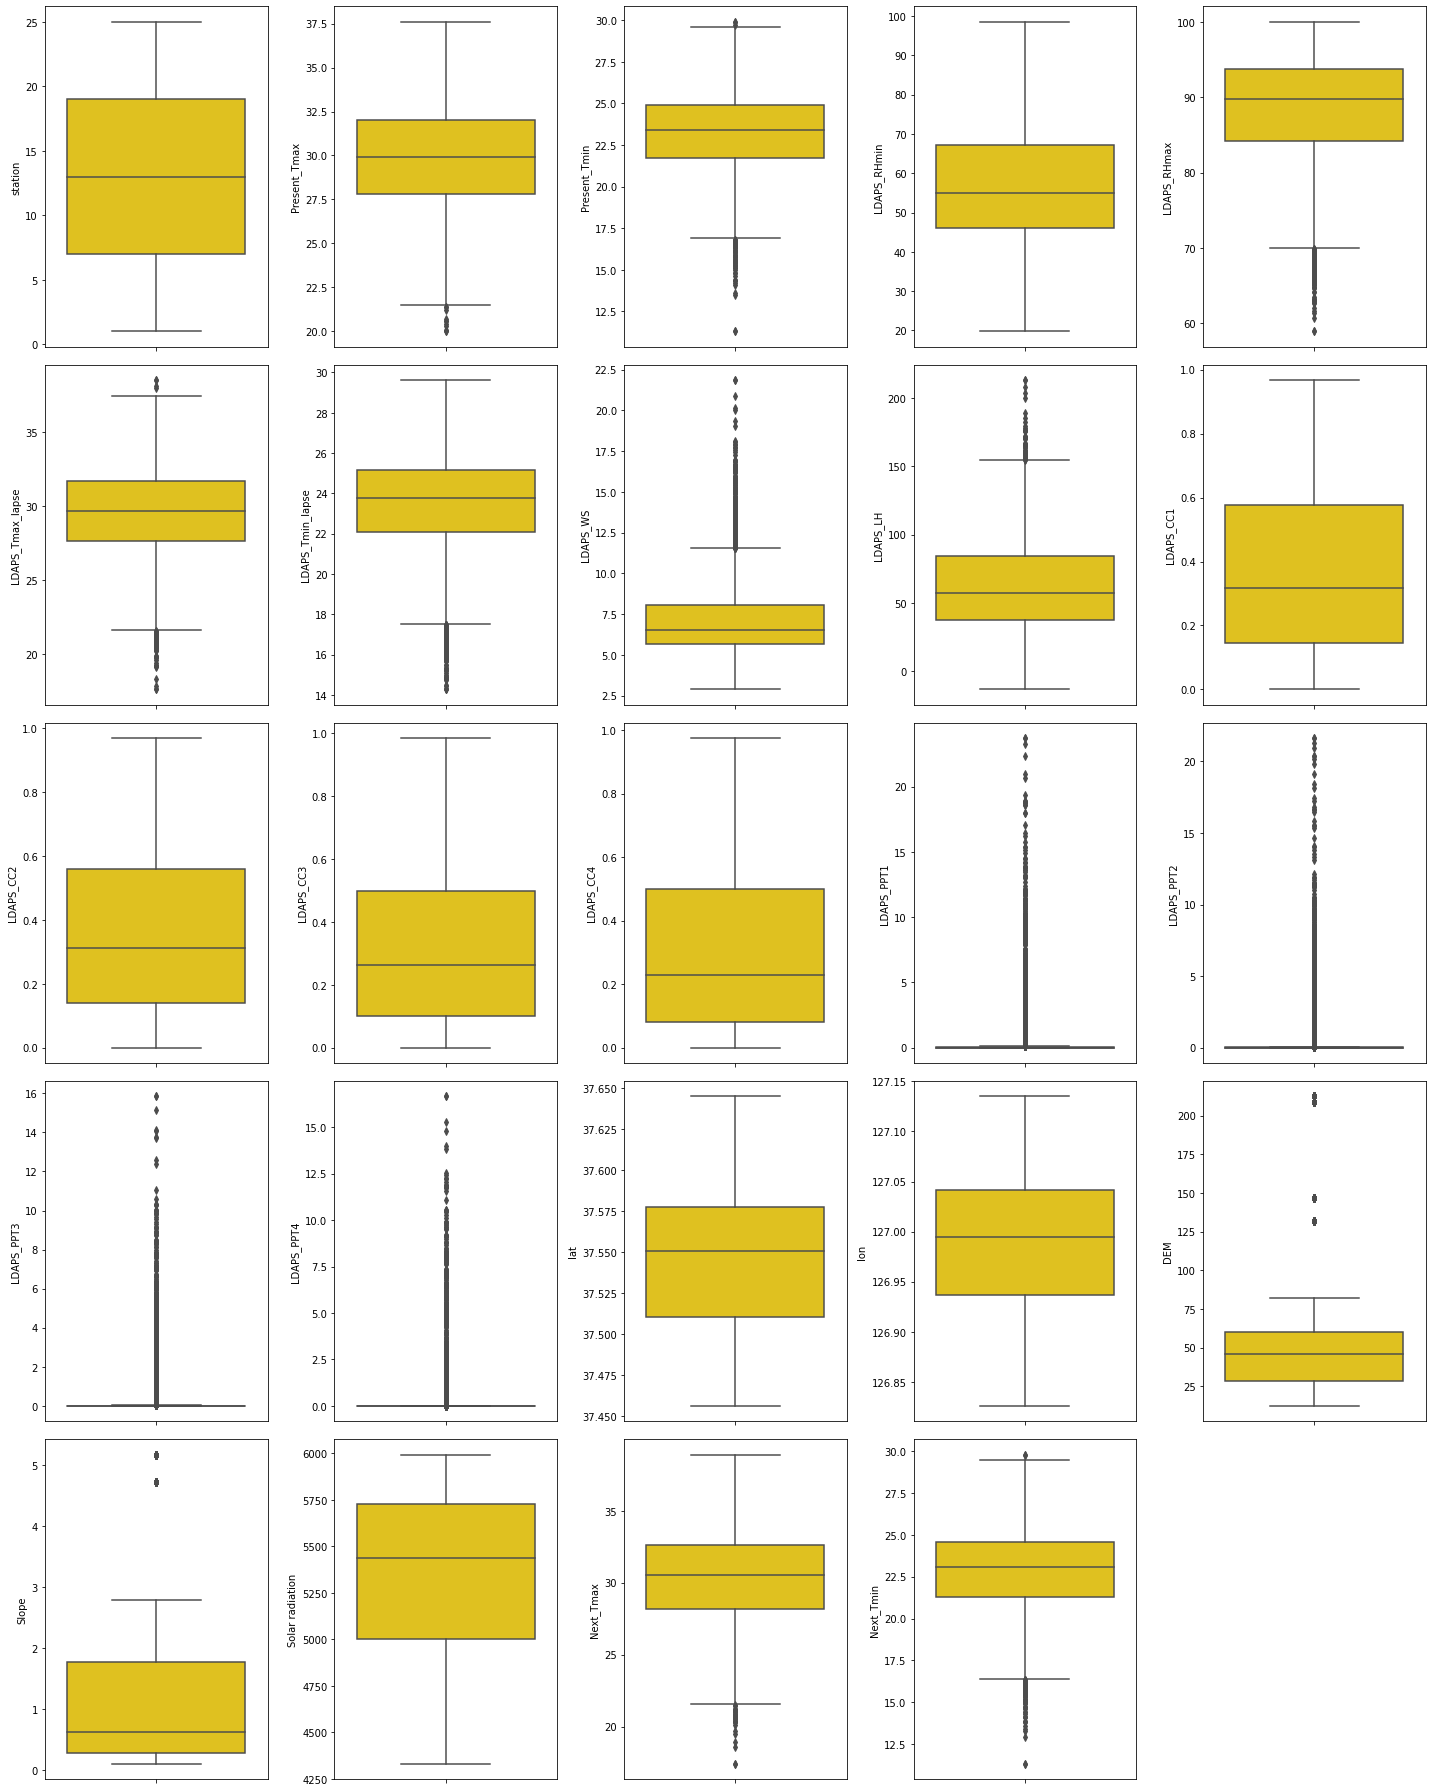

In [15]:
#ploting the box plot for the numerical data set 
plt.figure(figsize=(20,25))
for i,col in enumerate(num_col):
  plt.subplot(5,5,i+1)
  sn.boxplot(y=col,color='gold',data=df)
  plt.tight_layout()

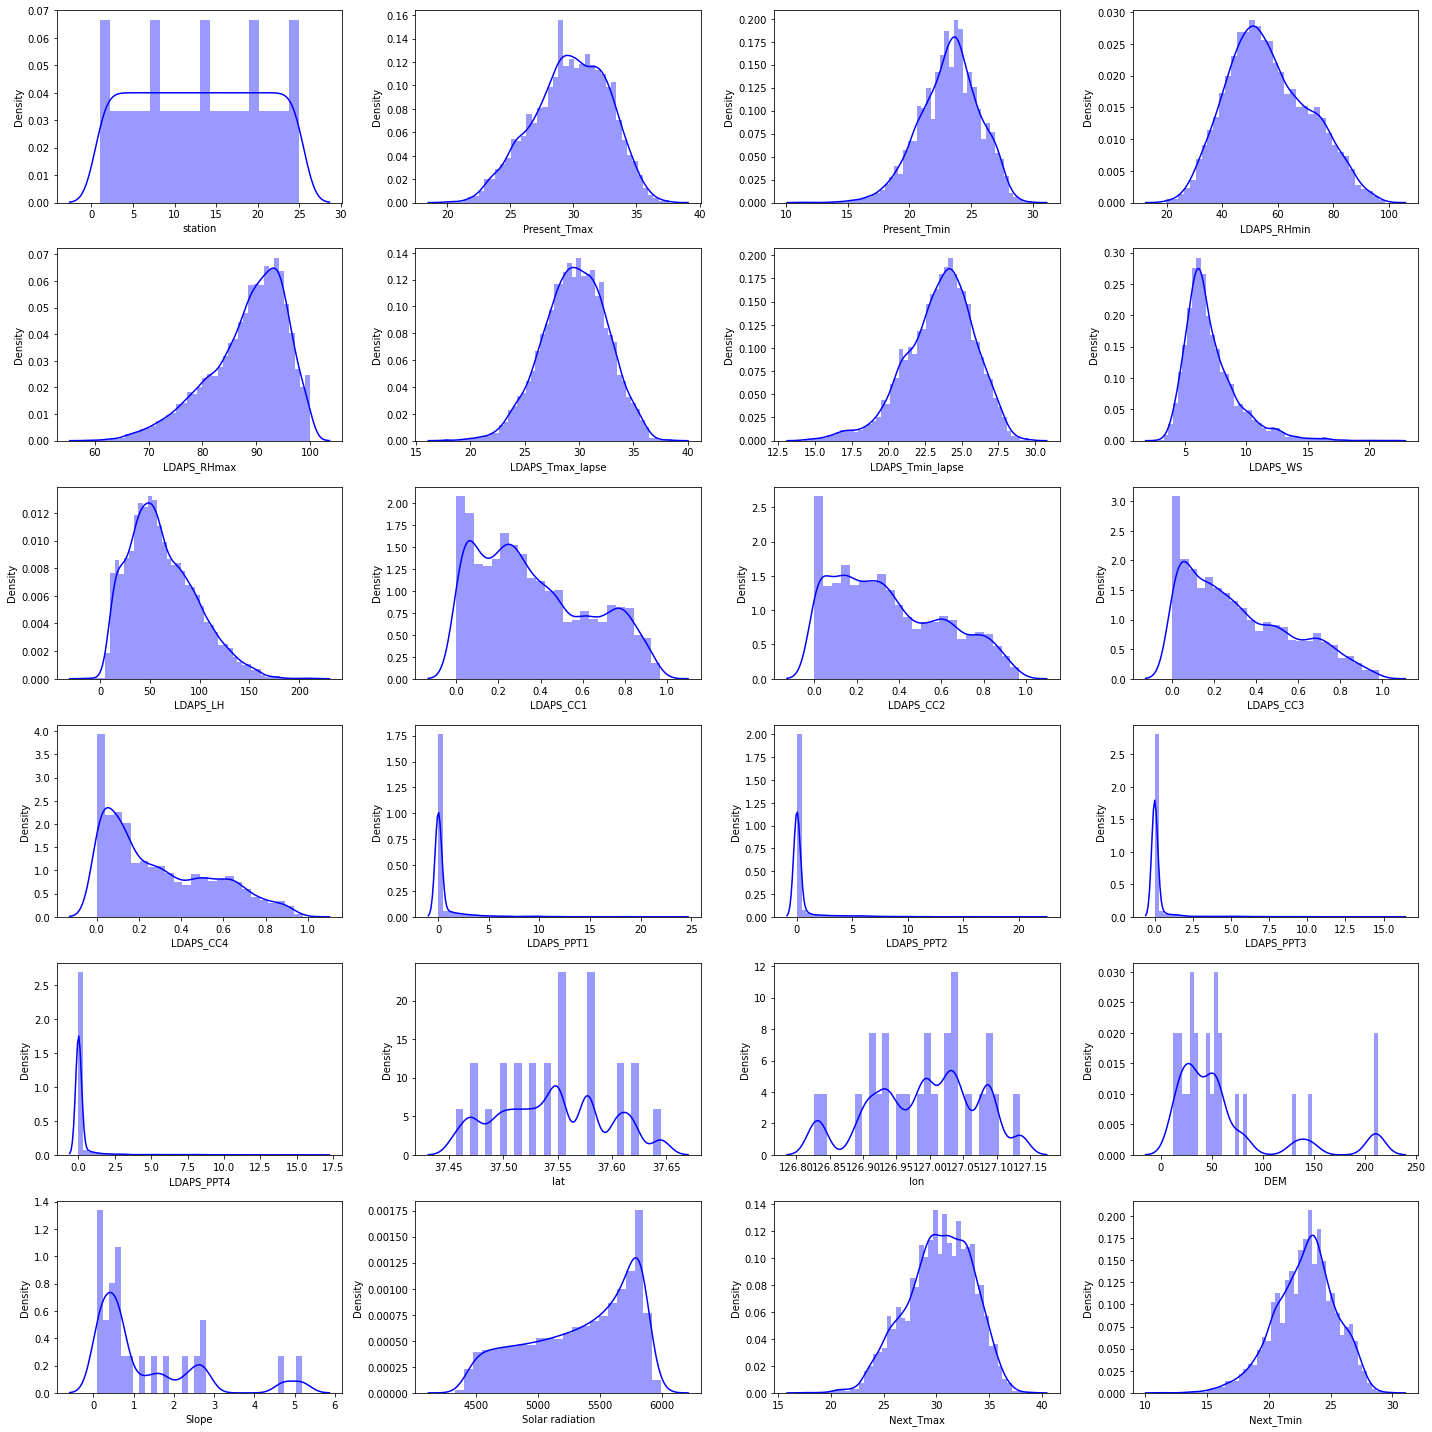

In [16]:
#ploting the dist plot for the numerical data set 
plt.figure(figsize=(20,20))
for i,col in enumerate(num_col):
  plt.subplot(6,4,i+1)
  sn.distplot(df[col],color='b')
  plt.tight_layout()

In [17]:
Numerical_column=['station', 'Present_Tmax', 'Present_Tmin', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
Categorical_column=['Date']

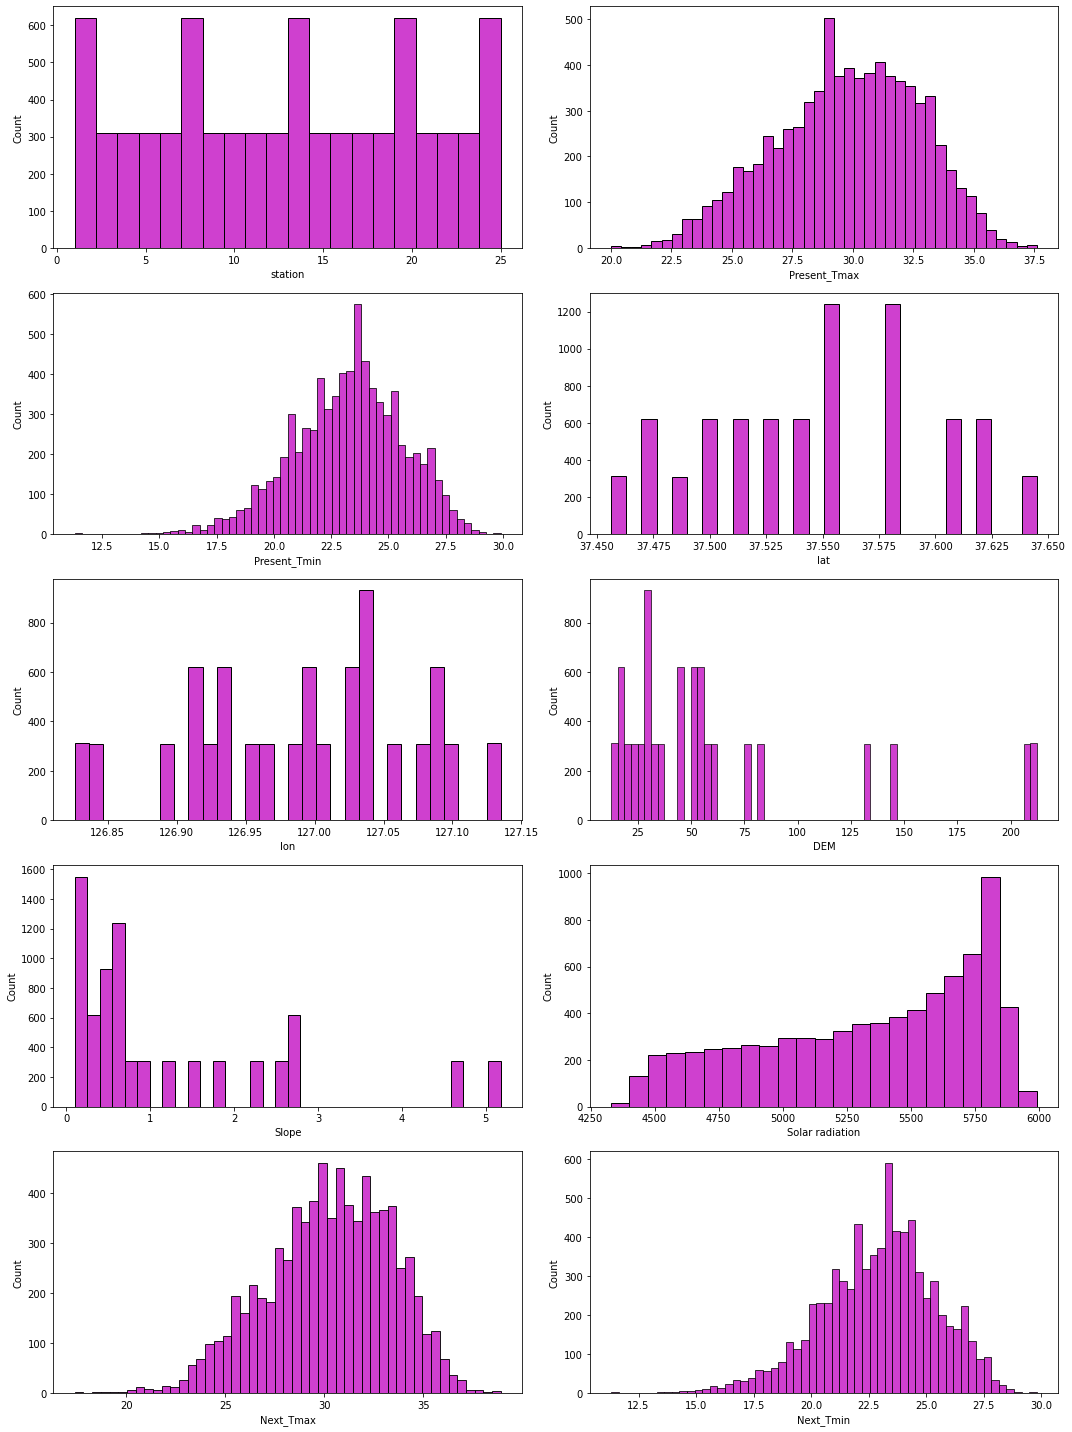

In [18]:
#plotting hist plot for catogorical variable
plt.figure(figsize=(15,20))
for i,col in enumerate(Numerical_column):
  plt.subplot(5,2,i+1)
  sn.histplot(x=col,color='m',data=df)
  plt.tight_layout()

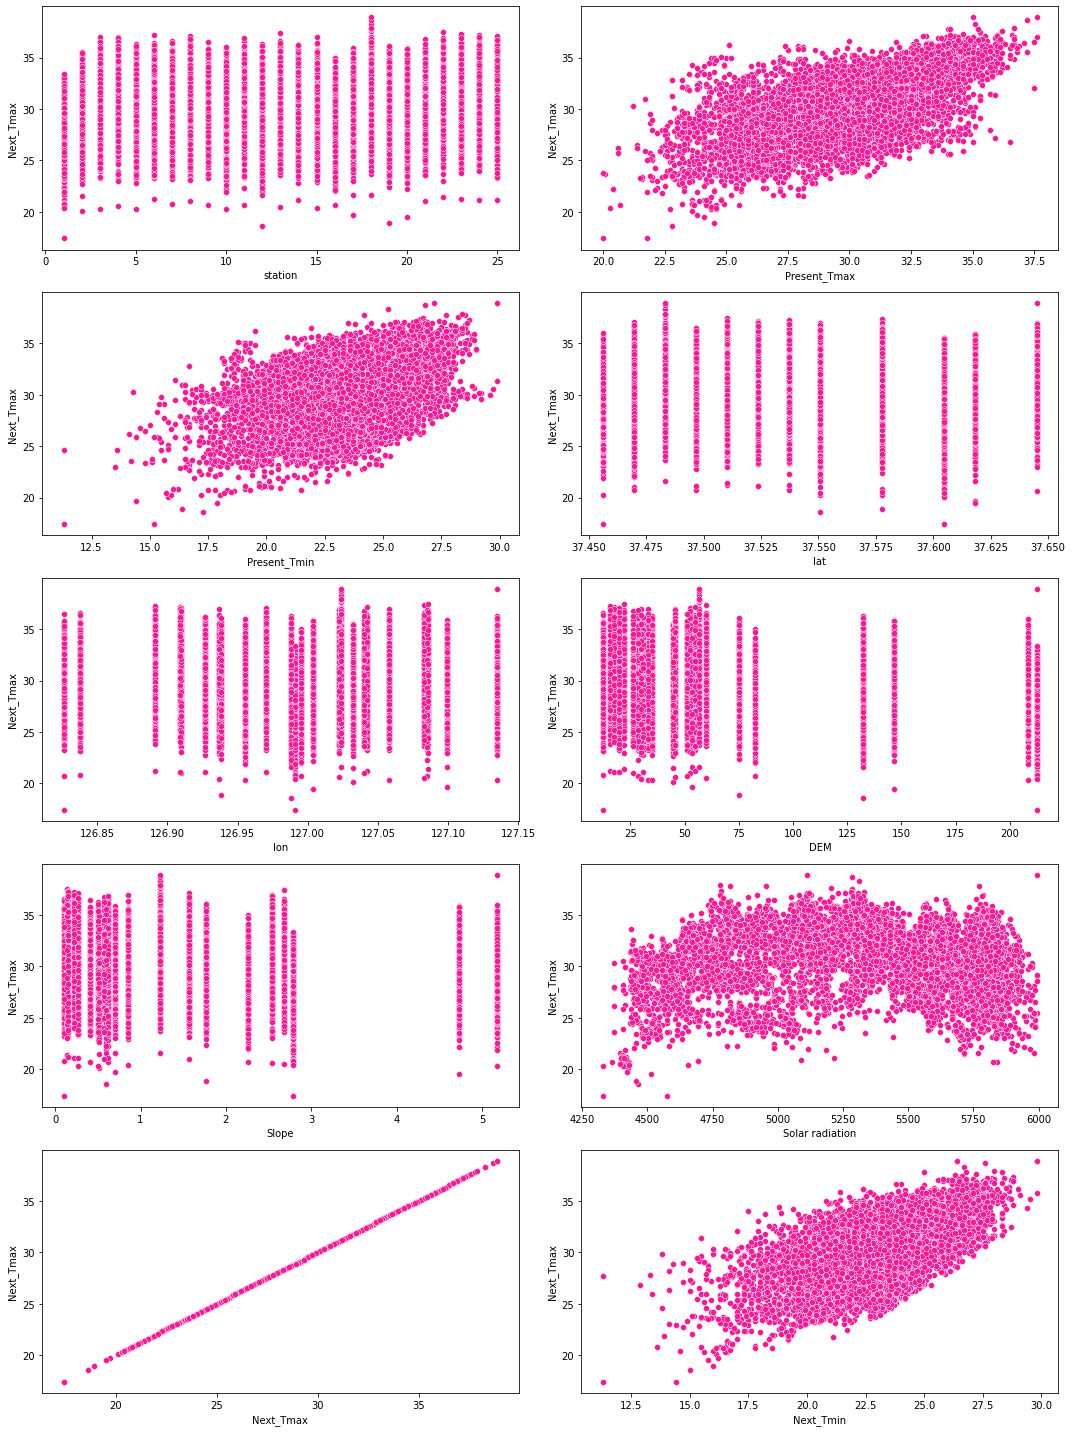

In [19]:
#plotting the scatter plot with Next_Tmax 
plt.figure(figsize=(15,20))
for n,col in enumerate(Numerical_column):
  plt.subplot(5,2,n+1)
  sn.scatterplot(x=col,y='Next_Tmax',color='deeppink',data=df)
  plt.tight_layout()

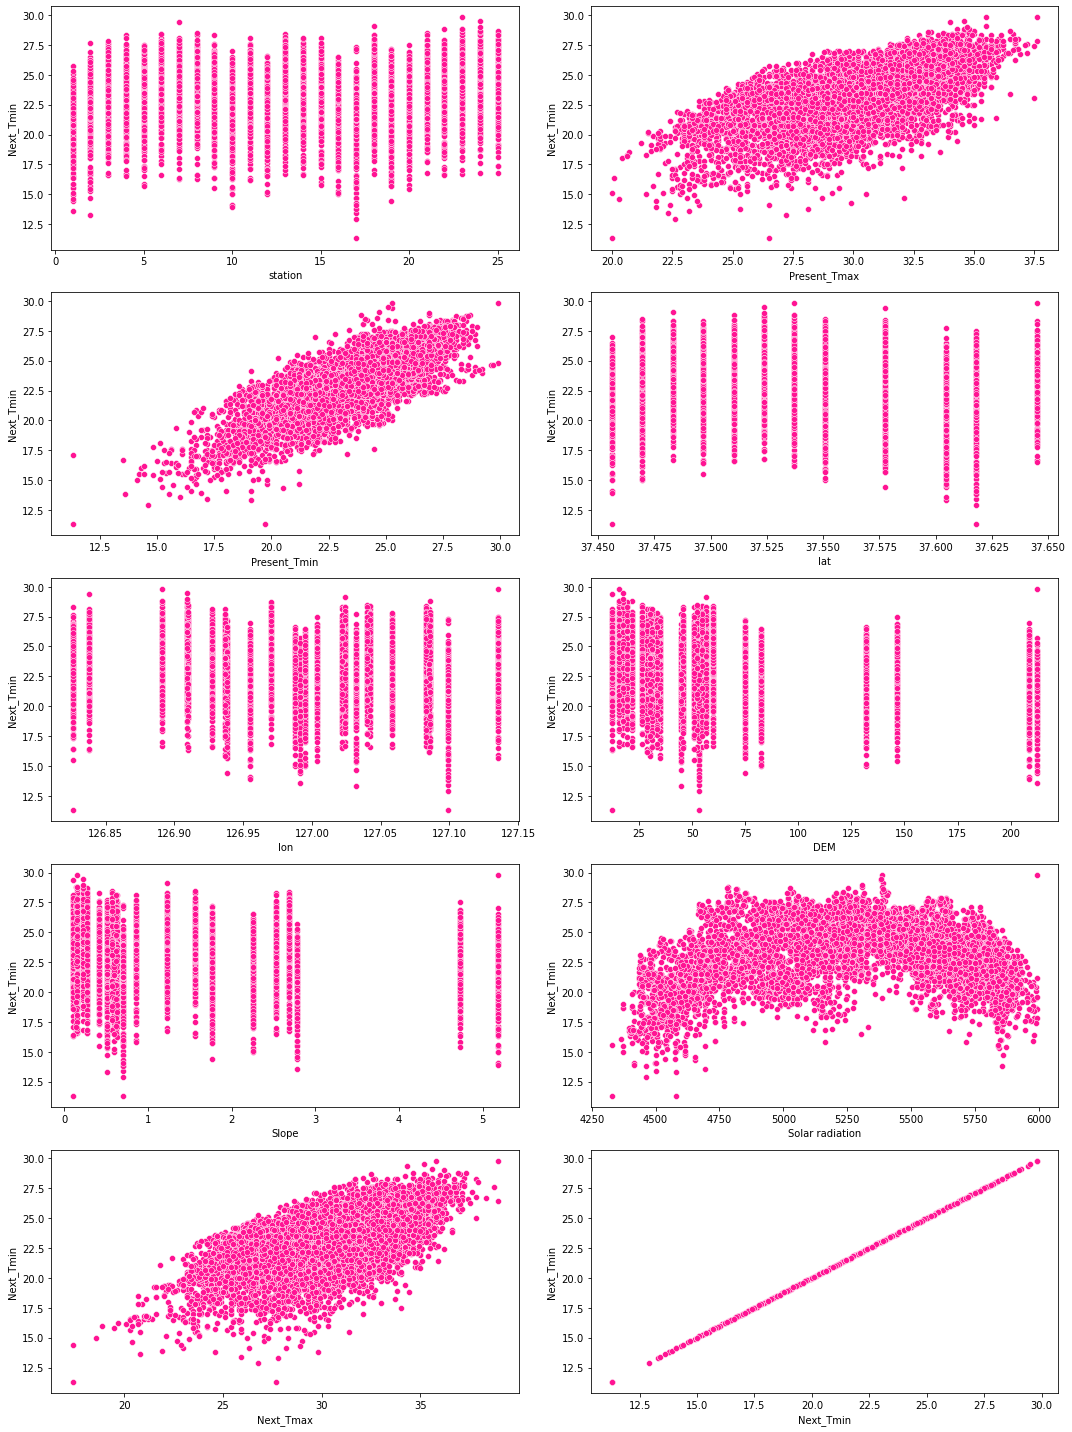

In [20]:
#plotting the scatter plot with Next_Tmin 
plt.figure(figsize=(15,20))
for n,col in enumerate(Numerical_column):
  plt.subplot(5,2,n+1)
  sn.scatterplot(x=col,y='Next_Tmin',color='deeppink',data=df)
  plt.tight_layout()

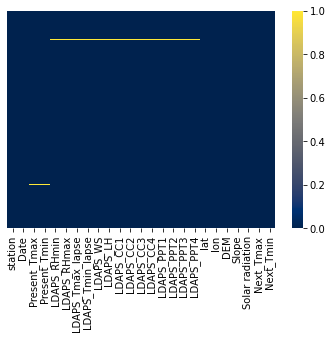

In [21]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(df.isnull(),yticklabels=False,cmap='cividis');

In [22]:
#displaying the rows with null value
df[df.isna().any(axis=1)]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,09-07-2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,0.890438,0.634022,0.371975,0.352818,2.645991,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5925.883789,23.4,22.0
271,22.0,10-07-2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,0.796409,0.570621,0.736160,0.689160,0.022148,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,5772.487305,26.1,24.1
300,1.0,12-07-2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,0.857962,0.966186,0.959959,0.902762,4.435039,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.785000,5893.265625,23.2,20.5
450,1.0,18-07-2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,0.392393,0.219702,0.293890,0.178251,0.000000,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.785000,5812.293457,27.6,21.8
464,15.0,18-07-2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,0.517181,0.231422,0.276836,0.203288,0.000000,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.855200,5681.875000,30.7,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,5.0,26-08-2017,NaN,NaN,43.755058,83.340240,25.842338,18.532986,4.926595,97.230757,0.079172,0.370131,0.391996,0.545452,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,4602.118164,26.1,17.9
7682,8.0,28-08-2017,26.3,18.1,29.959215,90.116638,23.135079,17.282587,9.292264,75.430868,0.351105,0.079918,0.049888,0.099056,0.000000,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,4518.488770,NaN,NaN
7707,8.0,29-08-2017,NaN,NaN,44.392651,75.728195,22.223247,15.954970,4.764492,37.786237,0.584957,0.665356,0.483782,0.087136,0.000000,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,4478.937012,23.1,16.3
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [23]:
#seeing correlation of each parameter with label column
dfcor=df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,0.003414,0.000698,0.006159,-0.002748,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


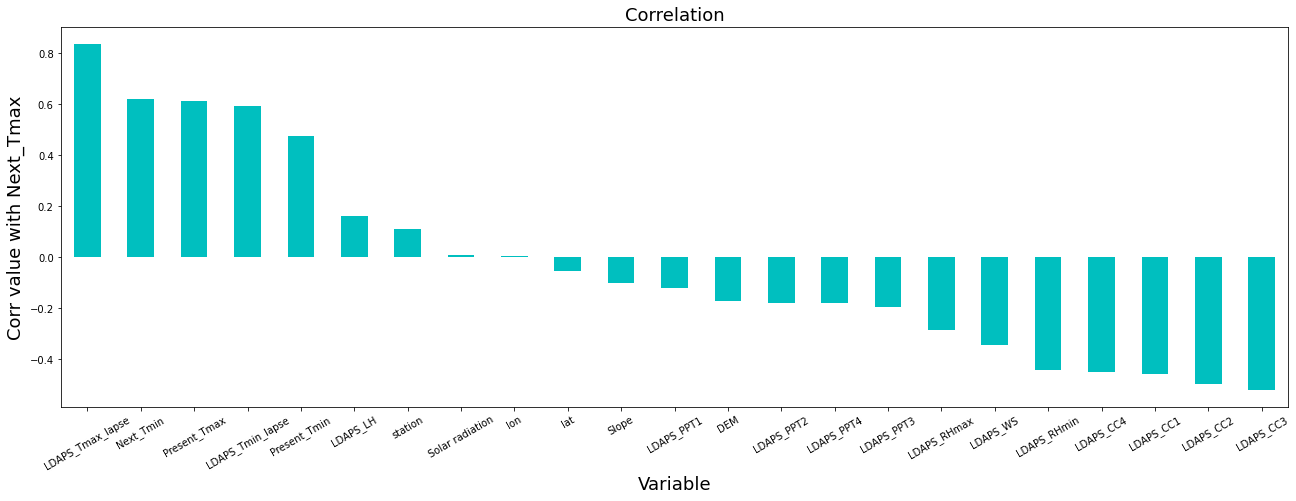

In [24]:
#seeing the correlation of each independent variable with dependent variable
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xticks(rotation=30)
plt.xlabel('Variable',fontsize=18)
plt.ylabel('Corr value with Next_Tmax',fontsize=18)
plt.title('Correlation',fontsize=18)
plt.show()

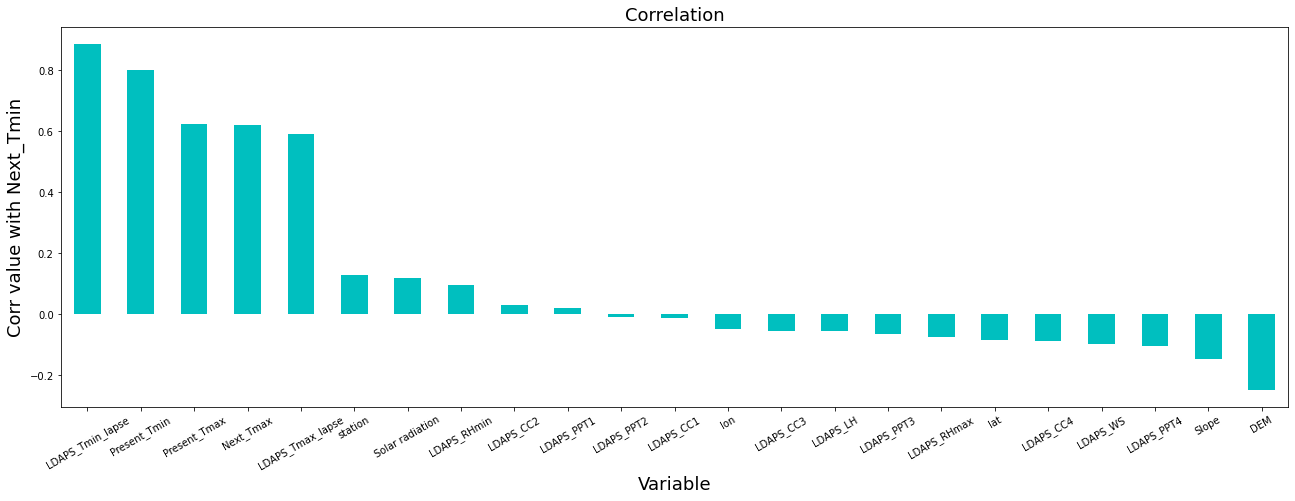

In [25]:
#seeing the correlation of each independent variable with dependent variable
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xticks(rotation=30)
plt.xlabel('Variable',fontsize=18)
plt.ylabel('Corr value with Next_Tmin',fontsize=18)
plt.title('Correlation',fontsize=18)
plt.show()

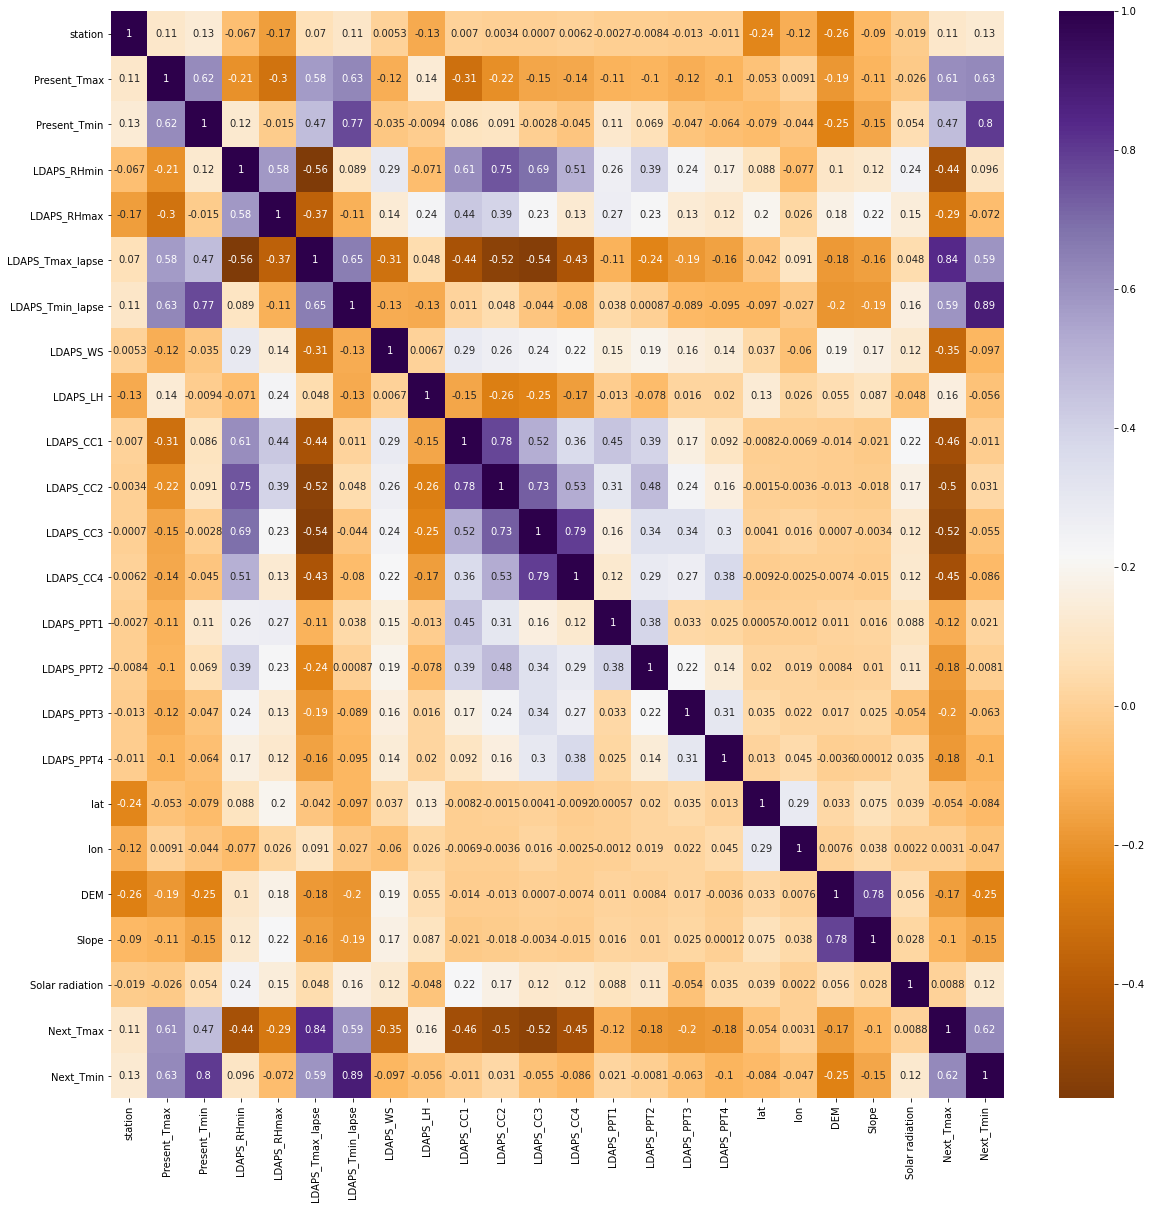

In [26]:
#corelation heatmap
plt.figure(figsize=(20,20))
sn.heatmap(dfcor,annot=True,cmap='PuOr')

# Data cleaning

In [27]:
#extracting the date and month from date column
df["Date"]=pd.to_datetime(df["Date"])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)

In [28]:
#filling the null value by median
for i in df.columns:
  if df[i].isnull().sum() >= 0:
    df[i]=df[i].fillna(df[i].median())

In [29]:
#making the copy for emergency
dff=df.copy()

In [30]:
#checking wheather to remove outlier by z score method or not
from scipy.stats import zscore
z=np.abs(zscore(dff))
dff=dff[(z<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",dff.shape)
p=100-(len(dff.index)/len(df.index)*100)
print(f'We are lossing {p} % of data.')

Before removing outliers:: (7752, 26)
After removing outliers:: (6894, 26)
We are lossing 11.068111455108351 % of data.


We are loosing more than 11% of data so we are not removing the outlier

In [31]:
#Creating the dependent and independent variable 
x=df.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
y=df[['Next_Tmax', 'Next_Tmin']]

In [32]:
#removing skewness by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [33]:
#importing the library for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

# Model building

In [34]:
#selecting the best random state
from sklearn.linear_model import LinearRegression

mA=0
mRS=0
for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
  mod=LinearRegression()
  mod.fit(x_train,y_train)
  pred=mod.predict(x_test)
  r2=r2_score(y_test,pred)
  if r2>mA:
    mA=r2
    mRS=i
print('Best accuracy is ',mA,' on random state ',mRS)

Best accuracy is  0.8062169596545069  on random state  89


In [35]:
#building the model using LinearRegression, RandomForestRegressor, DecissionTreeRegressor, svrkernal, Lasso
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [36]:
#spliting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=89)

In [37]:
#building model 
model={LinearRegression():"LinearRegression", DecisionTreeRegressor():'DecisionTreeRegressor', RandomForestRegressor():'RandomForestRegressor', Lasso():'Lasso'}
r2score=[]
crossvalidation=[]
for key in model:
  print("===== ",model.get(key),' model ===== ')
  key.fit(x_train,y_train)
  pred=key.predict(x_test)
  r2=r2_score(y_test,pred)
  print("R2 Score / Accuracy Score is ",r2)
  r2score.append(r2)
  cvv = KFold(n_splits=10, shuffle=True)
  c=cross_val_score(key,x,y,cv=cvv,scoring='r2')
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  mse=mean_squared_error(y_test,pred)
  print('Mean Squared Error',mse)
  mae=mean_absolute_error(y_test,pred)
  print('Mean Absolute Error',mae)
  print('\n\n\n')

=====  LinearRegression  model ===== 
R2 Score / Accuracy Score is  0.8062169596545069
Cross validation score is 0.7942933291119172 

Mean Squared Error 1.5957512830740073
Mean Absolute Error 0.9506424947719101




=====  DecisionTreeRegressor  model ===== 
R2 Score / Accuracy Score is  0.7700828673761582
Cross validation score is 0.7698561969580408 

Mean Squared Error 1.8264359415305258
Mean Absolute Error 0.9701203783318979




=====  RandomForestRegressor  model ===== 
R2 Score / Accuracy Score is  0.8997257696394942
Cross validation score is 0.9025872639908903 

Mean Squared Error 0.7977502469905411
Mean Absolute Error 0.6658101891659514




=====  Lasso  model ===== 
R2 Score / Accuracy Score is  0.6103054787297675
Cross validation score is 0.5978473428116788 

Mean Squared Error 3.12466260495575
Mean Absolute Error 1.3844759340854624






In [38]:
#selecting the best model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor','Lasso']
Modelselection['R2 Score']=r2score
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of R2 and Cross_Val']=abs(Modelselection['R2 Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,R2 Score,Cross Validation,Diff of R2 and Cross_Val
0,LinearRegression,0.806217,0.794293,0.011924
1,DecisionTreeRegressor,0.770083,0.769856,0.000227
2,RandomForestRegressor,0.899726,0.902587,0.002861
3,Lasso,0.610305,0.597847,0.012458


We have got RandomForestRegressor with high accuracy so lets do hyper parameter tuning on that

In [39]:
#hyper parameter tunning for RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

p1={'max_features':['sqrt','auto'],'max_depth':np.arange(2,5),'oob_score':['True']}
p2={'criterion': ['mse'],'bootstrap':['True'],'max_leaf_nodes':[2,4]}
p=[p1,p2]

for i in p:
  r_f=RandomForestRegressor()
  clf=GridSearchCV(r_f,i)
  clf.fit(x_train,y_train)
  print(clf.best_params_)

{'max_depth': 4, 'max_features': 'auto', 'oob_score': 'True'}
{'bootstrap': 'True', 'criterion': 'mse', 'max_leaf_nodes': 4}


In [40]:
model_1=RandomForestRegressor(max_depth=4, max_features='auto',oob_score='True')
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)
r2=r2_score(y_test,pred)
print("R2 Score / Accuracy Score is ",r2)
cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(model_1,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error',mse)
mae=mean_absolute_error(y_test,pred)
print('Mean Absolute Error',mae)

R2 Score / Accuracy Score is  0.7382955349549106
Cross validation score is 0.7239644142050033 

Mean Squared Error 2.1079317988103674
Mean Absolute Error 1.1235937483789327


In [41]:
model_2=RandomForestRegressor(bootstrap='True',criterion='mse', max_leaf_nodes=4)
model_2.fit(x_train,y_train)
pred=model_2.predict(x_test)
r2=r2_score(y_test,pred)
print("R2 Score / Accuracy Score is ",r2)
cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(model_2,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error',mse)
mae=mean_absolute_error(y_test,pred)
print('Mean Absolute Error',mae)

R2 Score / Accuracy Score is  0.5859704668103931
Cross validation score is 0.5721734193356102 

Mean Squared Error 3.36601113648812
Mean Absolute Error 1.4417021939606702


In [42]:
#final model
fin_mod=RandomForestRegressor()
fin_mod.fit(x_train,y_train)
pred=fin_mod.predict(x_test)
r2=r2_score(y_test,pred)
print("R2 Score / Accuracy Score is ",r2)
cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(fin_mod,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error',mse)
mae=mean_absolute_error(y_test,pred)
print('Mean Absolute Error',mae)

R2 Score / Accuracy Score is  0.9005637012661816
Cross validation score is 0.9029623505088955 

Mean Squared Error 0.7909187315133261
Mean Absolute Error 0.6635350386930345


We can see that we have got the model with **90%** accuracy with 1% deviation

# Saving the model

In [43]:
#MODEL SAVING
import joblib
joblib.dump(fin_mod,'FinalModel.pk1')

['FinalModel.pk1']